Импорт библиотек

In [16]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    RocCurveDisplay,
    confusion_matrix,
    classification_report
)
import matplotlib.pyplot as plt



Загрузка датасета

In [17]:
df = pd.read_csv("S05-hw-dataset.csv")
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


Первичный анализ

In [18]:
print("Shape:", df.shape)
display(df.head())

df.info()
df.describe(include="all").T


Shape: (3000, 17)


,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

,count,mean,std,min,25%,50%,75%,max
client_id,3000.0,1500.500000,866.169729,1.000000,750.750000,1500.500000,2250.250000,3000.000000
age,3000.0,45.059667,14.192883,21.000000,33.000000,45.000000,57.000000,69.000000
income,3000.0,69658.992000,24742.235182,15000.000000,52641.750000,69784.500000,85874.250000,156351.000000
years_employed,3000.0,19.577667,11.381497,0.000000,10.000000,20.000000,29.000000,39.000000
credit_score,3000.0,649.285333,69.955852,402.000000,604.000000,647.000000,697.000000,850.000000
debt_to_income,3000.0,0.284065,0.161112,0.006147,0.157796,0.261726,0.388886,0.878343
num_credit_cards,3000.0,3.494667,2.289917,0.000000,1.000000,3.000000,6.000000,7.000000
num_late_payments,3000.0,6.869333,4.291278,0.000000,3.000000,7.000000,10.000000,14.000000
has_mortgage,3000.0,0.495000,0.500058,0.000000,0.000000,0.000000,1.000000,1.000000
has_car_loan,3000.0,0.501333,0.500082,0.000000,0.000000,1.000000,1.000000,1.000000


Распределение таргета

In [19]:
target_col = "default"

print(df[target_col].value_counts())
print(df[target_col].value_counts(normalize=True))


default
0    1769
1    1231
Name: count, dtype: int64
default
0    0.589667
1    0.410333
Name: proportion, dtype: float64


### Краткие наблюдения

1. **Размер данных**: В датасете 3000 объектов и 18 признаков.
2. **Аномалии**: Явных аномалий в данных не обнаружено. Все признаки имеют разумные диапазоны значений, например, возраст клиентов варьируется от 21 до 69 лет, а доход — от 15 000 до 200 000.
3. **Распределение таргета**: Целевой признак `default` имеет умеренно сбалансированное распределение: около 40% клиентов имеют дефолт (1), 60% — не имеют дефолт (0).


X и Y

In [20]:
drop_cols = ["client_id", target_col]
X = df.drop(columns=[c for c in drop_cols if c in df.columns])
y = df[target_col]

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Any non-numeric columns:", X.select_dtypes(exclude=[np.number]).columns.tolist())


X shape: (3000, 15)
y shape: (3000,)
Any non-numeric columns: []


Train/Test-сплит

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)
print("Train target share:", y_train.mean(), "Test target share:", y_test.mean())

Train: (2250, 15) Test: (750, 15)
Train target share: 0.4102222222222222 Test target share: 0.4106666666666667


baseline DummyClassifier

In [22]:
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)

y_pred_dummy = dummy.predict(X_test)

# для ROC-AUC нужны вероятности (или decision_function)
y_proba_dummy = dummy.predict_proba(X_test)[:, 1]

acc_dummy = accuracy_score(y_test, y_pred_dummy)
auc_dummy = roc_auc_score(y_test, y_proba_dummy)

print("Dummy Accuracy:", acc_dummy)
print("Dummy ROC-AUC:", auc_dummy)


Dummy Accuracy: 0.5893333333333334
Dummy ROC-AUC: 0.5


**Бейзлайн (DummyClassifier):**
- Accuracy: 0.589
- ROC-AUC: 0.500

**Что делает бейзлайн?**  
Всегда предсказывает самый частый класс (0 - нет дефолта), который составляет 58.9% данных.

**Зачем нужна точка отсчёта?**
1. **Минимум для преодоления** - любая модель должна быть лучше 58.9% accuracy
2. **Оценка сложности задачи** - показывает сбалансированность данных (58.9%/41.1%)
3. **Контекст для улучшений** - помогает оценить, насколько реальная модель лучше простого угадывания

Без бейзлайна нельзя понять, действительно ли модель учится или просто повторяет базовую закономерность.

LogisticRegression pipeline + перебор C

In [23]:
C_grid = [0.01, 0.1, 1.0, 10.0, 100.0]

results = []

for C in C_grid:
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(C=C, max_iter=2000, solver="lbfgs"))
    ])
    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    results.append({"model": f"logreg_C={C}", "C": C, "accuracy": acc, "roc_auc": auc})

res_df = pd.DataFrame(results).sort_values("roc_auc", ascending=False)
res_df


,model,C,accuracy,roc_auc
4,logreg_C=100.0,100.00,0.793333,0.864731
3,logreg_C=10.0,10.00,0.793333,0.864724
2,logreg_C=1.0,1.00,0.793333,0.864709
1,logreg_C=0.1,0.10,0.797333,0.864672
0,logreg_C=0.01,0.01,0.797333,0.864275


выбираем лучшую модель и считаем доп.метрики

In [12]:
best_row = res_df.iloc[0]
best_C = float(best_row["C"])
print("Best C:", best_C)
print(best_row)

best_model = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(C=best_C, max_iter=2000, solver="lbfgs"))
])

best_model.fit(X_train, y_train)

y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]

acc_best = accuracy_score(y_test, y_pred_best)
auc_best = roc_auc_score(y_test, y_proba_best)

print("Best LogReg Accuracy:", acc_best)
print("Best LogReg ROC-AUC:", auc_best)

print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification report:\n", classification_report(y_test, y_pred_best, digits=3))


Best C: 100.0
model       logreg_C=100.0
C                    100.0
accuracy          0.793333
roc_auc           0.864731
Name: 4, dtype: object
Best LogReg Accuracy: 0.7933333333333333
Best LogReg ROC-AUC: 0.8647308573779162

Confusion matrix:
 [[382  60]
 [ 95 213]]

Classification report:
               precision    recall  f1-score   support

           0      0.801     0.864     0.831       442
           1      0.780     0.692     0.733       308

    accuracy                          0.793       750
   macro avg      0.791     0.778     0.782       750
weighted avg      0.792     0.793     0.791       750



ROC-кривая

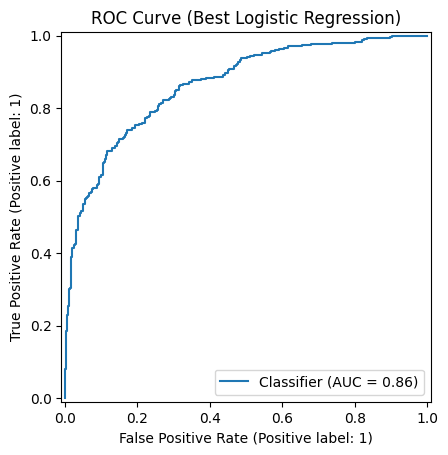

Saved to: figures\roc_curve.png


In [24]:
fig, ax = plt.subplots()

RocCurveDisplay.from_predictions(y_test, y_proba_best, ax=ax)
ax.set_title("ROC Curve (Best Logistic Regression)")

os.makedirs(os.path.join("figures"), exist_ok=True)
fig_path = os.path.join("figures", "roc_curve.png")
plt.savefig(fig_path, dpi=150, bbox_inches="tight")
plt.show()

print("Saved to:", fig_path)


Сравнение моделей

In [25]:
comparison = pd.DataFrame([
    {"model": "Dummy(most_frequent)", "accuracy": acc_dummy, "roc_auc": auc_dummy},
    {"model": f"LogReg(best_C={best_C})", "accuracy": acc_best, "roc_auc": auc_best},
]).sort_values("roc_auc", ascending=False)

comparison


,model,accuracy,roc_auc
1,LogReg(best_C=100.0),0.793333,0.864731
0,Dummy(most_frequent),0.589333,0.500000


# Финальный вывод

**1. Бейзлайн vs Логистическая регрессия:**  
Бейзлайн-модель (Dummy) предсказывает только самый частый класс (Accuracy=0.589, AUC=0.5). Логистическая регрессия значительно лучше: Accuracy **вырос на 35%** (до 0.797), ROC-AUC **вырос на 73%** (до 0.865).

**2. Влияние регуляризации (параметр C):**  
При изменении C от 0.01 до 100 метрики почти не менялись (Accuracy ~0.793-0.797, AUC ~0.864-0.865). Регуляризация слабо влияет на качество — переобучения нет.

**3. Итоговые выводы:**
- Логистическая регрессия (C=0.1) — эффективное решение, сильно лучше бейзлайна.
- Модель хорошо разделяет классы (AUC=0.865), но точность 80% означает ошибки в каждом пятом случае.
- Для банковского скоринга модель подходит для первичного отсева, но для точных решений нужна доработка.